## **Section 1: Importing Modules and uploading datasets into dataframes**

In [1]:
# import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import *

In [ ]:
# mount google drive to download datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import contracts and accounts dataset for analysis into dataframes via pandas
adf = pd.read_csv('/content/drive/MyDrive/customer_churn/accounts.csv')
cdf = pd.read_csv('/content/drive/MyDrive/customer_churn/contracts.csv')


## **Section 2: Preliminary Analysis**

In [ ]:
# Check the account dataset
adf.head(2)

,accountID,region,partnerInvolved
0,wod6kb,North America,Yes
1,nikq3g,Africa,Yes


In [ ]:
# Columns and datatype
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   accountID        3000 non-null   object
 1   region           3000 non-null   object
 2   partnerInvolved  3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [ ]:
# accounts dataset descriptive statistics
adf.describe()

,accountID,region,partnerInvolved
count,3000,3000,3000
unique,3000,5,2
top,wod6kb,EMEA,No
freq,1,1031,2294


In [ ]:
# Check contracts dataset
cdf.head(2)

,closingDate,contractSize,contractLength,contractID,paymentDate
0,2013/01/01,90.0,2,OLV-julh8a-0001,2013/03/28
1,2013/01/01,195.0,1,OLV-ujmvzq-0001,2013/04/21


In [ ]:
# Columns and datatypes in contracts dataset
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   closingDate     7628 non-null   object 
 1   contractSize    7628 non-null   float64
 2   contractLength  7628 non-null   int64  
 3   contractID      7628 non-null   object 
 4   paymentDate     7350 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 298.1+ KB


In [ ]:
# Descriptive statistics on Contracts dataset
cdf.describe()

,contractSize,contractLength
count,7628.000000,7628.000000
mean,168.825773,2.003802
std,100.826310,0.811360
min,50.000000,1.000000
25%,92.000000,1.000000
50%,145.000000,2.000000
75%,220.000000,3.000000
max,946.000000,3.000000


In [ ]:
# Checking for null values in accounts
adf.isna().sum()

accountID          0
region             0
partnerInvolved    0
dtype: int64

In [ ]:
# Checking for null values in contracts
cdf.isna().sum()

closingDate         0
contractSize        0
contractLength      0
contractID          0
paymentDate       278
dtype: int64

In [ ]:
# datatype of closingDate
type(cdf.closingDate.iloc[1])

str

In [ ]:
# Contract end data is closing date plus the length of contract
cdf['contract_expiry_date'] = cdf['closingDate'].astype('datetime64[D]') \
                 + cdf['contractLength'].astype('timedelta64[Y]')

In [ ]:
cdf.head()

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date
0,2013/01/01,90.0,2,OLV-julh8a-0001,2013/03/28,2015-01-01
1,2013/01/01,195.0,1,OLV-ujmvzq-0001,2013/04/21,2014-01-01
2,2013/01/01,110.0,2,OLV-0ar1mc-0001,2013/03/23,2015-01-01
3,2013/01/02,55.0,3,OLV-13y3ml-0001,2013/03/22,2016-01-03
4,2013/01/03,275.0,2,OLV-lcssnx-0001,2013/04/20,2015-01-03


In [ ]:
# ContractId is a string made of Vendor code, accountId code, and the sequence number of contract for the accountID
# the contractID is separated into three separate columns containing VendorID, accountID, and Occurence number  
cdf[['Vendor','accountID','Occurence_no']]=cdf.contractID.str.split('-',expand=True)
cdf['Occurence_no']=cdf['Occurence_no'].astype(int)

In [ ]:
# Check cdf after addition of columns
cdf.head(2)

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no
0,2013/01/01,90.0,2,OLV-julh8a-0001,2013/03/28,2015-01-01,OLV,julh8a,1
1,2013/01/01,195.0,1,OLV-ujmvzq-0001,2013/04/21,2014-01-01,OLV,ujmvzq,1


In [ ]:
# Checking Closingdate of contracts in year 2021 and beyond
cdf['closingDate'] = pd.to_datetime(cdf['closingDate'])
cdf[cdf['closingDate'].dt.year >= 2021]


,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no
7119,2021-01-01,149.0,3,OLV-llogub-0006,2021/04/11,2024-01-02,OLV,llogub,6
7120,2021-01-01,282.0,1,OLV-lcssnx-0006,2021/03/23,2022-01-01,OLV,lcssnx,6
7121,2021-01-01,223.0,3,OLV-6unrx0-0005,2021/03/22,2024-01-02,OLV,6unrx0,5
7122,2021-01-01,240.0,1,OLV-wkq9t8-0006,2021/03/27,2022-01-01,OLV,wkq9t8,6
7123,2021-01-02,465.0,2,OLV-rnzyqw-0002,2021/04/09,2023-01-02,OLV,rnzyqw,2
...,...,...,...,...,...,...,...,...,...
7623,2021-06-29,357.0,3,OLV-p3nwky-0006,NaN,2024-06-29,OLV,p3nwky,6
7624,2021-06-29,175.0,1,OLV-p009ge-0004,NaN,2022-06-29,OLV,p009ge,4
7625,2021-06-30,203.0,1,OLV-am5nm2-0004,NaN,2022-06-30,OLV,am5nm2,4
7626,2021-06-30,154.0,1,OLV-02k5gq-0004,NaN,2022-06-30,OLV,02k5gq,4


In [ ]:
# Checking paymentdate for contract initiated after 2021   
sd=cdf[cdf['closingDate'].dt.year >= 2021]
sd[sd['paymentDate'].isna()]

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no
7248,2021-02-21,272.0,2,OLV-1stu3q-0002,NaN,2023-02-21,OLV,1stu3q,2
7266,2021-02-26,348.0,2,OLV-11u7p7-0003,NaN,2023-02-26,OLV,11u7p7,3
7270,2021-02-27,100.0,1,OLV-lmxmzo-0004,NaN,2022-02-27,OLV,lmxmzo,4
7286,2021-03-05,322.0,3,OLV-2c6ccs-0003,NaN,2024-03-05,OLV,2c6ccs,3
7287,2021-03-05,228.0,3,OLV-erwp16-0004,NaN,2024-03-05,OLV,erwp16,4
...,...,...,...,...,...,...,...,...,...
7623,2021-06-29,357.0,3,OLV-p3nwky-0006,NaN,2024-06-29,OLV,p3nwky,6
7624,2021-06-29,175.0,1,OLV-p009ge-0004,NaN,2022-06-29,OLV,p009ge,4
7625,2021-06-30,203.0,1,OLV-am5nm2-0004,NaN,2022-06-30,OLV,am5nm2,4
7626,2021-06-30,154.0,1,OLV-02k5gq-0004,NaN,2022-06-30,OLV,02k5gq,4


In [ ]:
cdf['paymentDate']=pd.to_datetime(cdf['paymentDate'])

In [ ]:
# Defining new feature length to pay
cdf['length_to_pay']=(cdf['paymentDate']-cdf['closingDate'])

In [ ]:
cdf.head()

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay
0,2013-01-01,90.0,2,OLV-julh8a-0001,2013-03-28,2015-01-01,OLV,julh8a,1,86 days
1,2013-01-01,195.0,1,OLV-ujmvzq-0001,2013-04-21,2014-01-01,OLV,ujmvzq,1,110 days
2,2013-01-01,110.0,2,OLV-0ar1mc-0001,2013-03-23,2015-01-01,OLV,0ar1mc,1,81 days
3,2013-01-02,55.0,3,OLV-13y3ml-0001,2013-03-22,2016-01-03,OLV,13y3ml,1,79 days
4,2013-01-03,275.0,2,OLV-lcssnx-0001,2013-04-20,2015-01-03,OLV,lcssnx,1,107 days


In [ ]:
cdf.columns

Index(['closingDate', 'contractSize', 'contractLength', 'contractID',
       'paymentDate', 'contract_expiry_date', 'Vendor', 'accountID',
       'Occurence_no', 'length_to_pay'],
      dtype='object')

In [ ]:
type(cdf.length_to_pay.iloc[1])

pandas._libs.tslibs.timedeltas.Timedelta

In [ ]:
cdf['length_to_pay']=pd.to_timedelta(cdf.length_to_pay, errors='coerce').dt.days

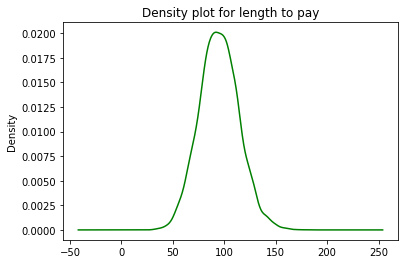

In [ ]:
cdf.length_to_pay.plot.density(color='green')
plt.title('Density plot for length to pay')
plt.show()

In [ ]:
sd=cdf[cdf['closingDate'].dt.year >= 2021]

In [ ]:
sd[sd['paymentDate'].isna()]

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay
7248,2021-02-21,272.0,2,OLV-1stu3q-0002,NaT,2023-02-21,OLV,1stu3q,2,NaN
7266,2021-02-26,348.0,2,OLV-11u7p7-0003,NaT,2023-02-26,OLV,11u7p7,3,NaN
7270,2021-02-27,100.0,1,OLV-lmxmzo-0004,NaT,2022-02-27,OLV,lmxmzo,4,NaN
7286,2021-03-05,322.0,3,OLV-2c6ccs-0003,NaT,2024-03-05,OLV,2c6ccs,3,NaN
7287,2021-03-05,228.0,3,OLV-erwp16-0004,NaT,2024-03-05,OLV,erwp16,4,NaN
...,...,...,...,...,...,...,...,...,...,...
7623,2021-06-29,357.0,3,OLV-p3nwky-0006,NaT,2024-06-29,OLV,p3nwky,6,NaN
7624,2021-06-29,175.0,1,OLV-p009ge-0004,NaT,2022-06-29,OLV,p009ge,4,NaN
7625,2021-06-30,203.0,1,OLV-am5nm2-0004,NaT,2022-06-30,OLV,am5nm2,4,NaN
7626,2021-06-30,154.0,1,OLV-02k5gq-0004,NaT,2022-06-30,OLV,02k5gq,4,NaN


In [ ]:
def gap_between_deal(df,fulldf):
  acc_id=df['accountID']
  new_deal_date=df['closingDate']
  occ_no=df['Occurence_no']
  filtered_df=fulldf[fulldf['accountID']==acc_id]
  if occ_no > 1:
    tempdf=filtered_df[filtered_df['Occurence_no']==occ_no-1]
    gap_days=(new_deal_date - tempdf['contract_expiry_date'].iloc[0]).days

  else:
    gap_days=99999999999
  return gap_days


In [ ]:
cdf['gap_between_deals'] =cdf.apply(gap_between_deal,fulldf=cdf,axis=1)

In [ ]:
cdf[cdf['Occurence_no']>1].head(2)

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals
386,2014-01-01,252.0,2,OLV-ujmvzq-0002,2014-04-23,2016-01-01,OLV,ujmvzq,2,112.0,0
390,2014-01-03,75.0,2,OLV-llogub-0002,2014-04-05,2016-01-03,OLV,llogub,2,92.0,0


In [ ]:
cdf.head()

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals
0,2013-01-01,90.0,2,OLV-julh8a-0001,2013-03-28,2015-01-01,OLV,julh8a,1,86.0,99999999999
1,2013-01-01,195.0,1,OLV-ujmvzq-0001,2013-04-21,2014-01-01,OLV,ujmvzq,1,110.0,99999999999
2,2013-01-01,110.0,2,OLV-0ar1mc-0001,2013-03-23,2015-01-01,OLV,0ar1mc,1,81.0,99999999999
3,2013-01-02,55.0,3,OLV-13y3ml-0001,2013-03-22,2016-01-03,OLV,13y3ml,1,79.0,99999999999
4,2013-01-03,275.0,2,OLV-lcssnx-0001,2013-04-20,2015-01-03,OLV,lcssnx,1,107.0,99999999999


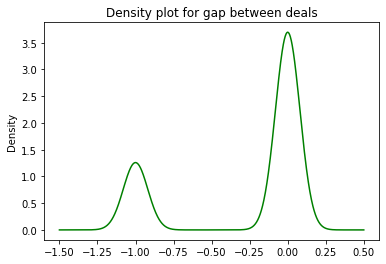

In [ ]:
cdf[cdf['Occurence_no']>1].gap_between_deals.plot.density(color='green')
plt.title('Density plot for gap between deals')
plt.show()

In [ ]:
cdf.gap_between_deals.unique()

array([99999999999,           0,          -1])

In [ ]:
gdf=cdf[['contractSize','contractLength','accountID','Occurence_no','length_to_pay','contract_expiry_date']]

In [ ]:
gdf.head()

,contractSize,contractLength,accountID,Occurence_no,length_to_pay,contract_expiry_date
0,90.0,2,julh8a,1,86.0,2015-01-01
1,195.0,1,ujmvzq,1,110.0,2014-01-01
2,110.0,2,0ar1mc,1,81.0,2015-01-01
3,55.0,3,13y3ml,1,79.0,2016-01-03
4,275.0,2,lcssnx,1,107.0,2015-01-03


In [ ]:
sd=gdf.groupby('accountID',as_index=False).agg({'contractSize':'mean','contractLength':'mean','Occurence_no':'max','length_to_pay':'mean','contract_expiry_date':'max'})

In [ ]:
sd.shape

(3000, 6)

In [ ]:
cdf[cdf['accountID']=='00t9nx']

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals
4530,2018-11-01,320.0,3,OLV-00t9nx-0001,2019-01-23,2021-11-01,OLV,00t9nx,1,83.0,99999999999


In [ ]:
cdf['closingDate'].max()

Timestamp('2021-06-30 00:00:00')

In [ ]:
cdf[cdf['contract_expiry_date']==cdf['contract_expiry_date'].max()]

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals
7623,2021-06-29,357.0,3,OLV-p3nwky-0006,NaT,2024-06-29,OLV,p3nwky,6,NaN,-1


In [ ]:
cdf['closingDate'].max()

Timestamp('2021-06-30 00:00:00')

In [ ]:
type(testdataset_date)

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
cutoffdate=cdf['closingDate'].max()+ datetime.timedelta(days=1)
cutoffdate

Timestamp('2021-07-01 00:00:00')

In [ ]:
offsetdate=testdataset_date + relativedelta(months=6)
offsetdate

Timestamp('2022-01-01 00:00:00')

In [ ]:
cdf[cdf['contract_expiry_date']<=cdf['closingDate'].max()]['closingDate'].max()

Timestamp('2020-06-30 00:00:00')

In [ ]:
cdf[cdf['contract_expiry_date']<=cdf['closingDate'].max()].shape

(5343, 11)

In [ ]:
cdf[cdf['closingDate']==cdf['closingDate'].max()]

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals
7625,2021-06-30,203.0,1,OLV-am5nm2-0004,NaT,2022-06-30,OLV,am5nm2,4,NaN,-1
7626,2021-06-30,154.0,1,OLV-02k5gq-0004,NaT,2022-06-30,OLV,02k5gq,4,NaN,-1
7627,2021-06-30,87.0,1,OLV-uvj5e3-0003,NaT,2022-06-30,OLV,uvj5e3,3,NaN,0


In [ ]:
cdf[cdf['closingDate']>=cdf[cdf['contract_expiry_date']<=cdf['closingDate'].max()]['closingDate'].max()].shape

(1052, 11)

In [ ]:
cdf.shape

(7628, 11)

In [ ]:
cdf[cdf['contract_expiry_date']>=offsetdate].shape

(1669, 11)

In [ ]:
cdf[cdf['contract_expiry_date']>=offsetdate].isna().sum()

closingDate               0
contractSize              0
contractLength            0
contractID                0
paymentDate             278
contract_expiry_date      0
Vendor                    0
accountID                 0
Occurence_no              0
length_to_pay           278
gap_between_deals         0
dtype: int64

In [ ]:
if cutoffdate in [offsetdate]:
  print(True)
else:
  print(False)

False


In [ ]:
def determine_churn(d,present_day,wdf):
  ce_dt=d['contract_expiry_date']
  ce_bfdt=ce_dt - datetime.timedelta(days=1)
  ce_afdt=ce_dt + datetime.timedelta(days=1)
  cus=d['accountID']
  if ce_dt>present_day:
    res="unknown"
  else:
    cusdf=wdf[wdf['accountID']==cus]
    closingdt_lst = cusdf['closingDate'].tolist()
    if ce_dt in closingdt_lst or ce_afdt in closingdt_lst or ce_bfdt in closingdt_lst:
      res="renewed"
    else:
      res="not renewed"
  return res

In [ ]:
mdf=pd.merge(cdf,adf,on='accountID',how='inner')

In [ ]:
mdf.head()

,closingDate,contractSize,contractLength,contractID,paymentDate,contract_expiry_date,Vendor,accountID,Occurence_no,length_to_pay,gap_between_deals,region,partnerInvolved
0,2013-01-01,90.0,2,OLV-julh8a-0001,2013-03-28,2015-01-01,OLV,julh8a,1,86.0,99999999999,North America,No
1,2015-01-01,370.0,1,OLV-julh8a-0002,2015-03-15,2016-01-01,OLV,julh8a,2,73.0,0,North America,No
2,2016-01-01,505.0,1,OLV-julh8a-0003,2016-04-07,2016-12-31,OLV,julh8a,3,97.0,0,North America,No
3,2013-01-01,195.0,1,OLV-ujmvzq-0001,2013-04-21,2014-01-01,OLV,ujmvzq,1,110.0,99999999999,APAC,No
4,2014-01-01,252.0,2,OLV-ujmvzq-0002,2014-04-23,2016-01-01,OLV,ujmvzq,2,112.0,0,APAC,No


In [ ]:
mdf['is_renewal']=mdf.apply(determine_churn,present_day=cdf['closingDate'].max(),wdf=mdf,axis=1)

In [ ]:
mdf['Quarter']=mdf['closingDate'].dt.quarter

In [ ]:
mdf.head()

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,region,partnerInvolved,Quarter,is_renewal
0,2013-01-01,90.0,2,2013-03-28,2015-01-01,julh8a,1,86.0,North America,No,Q1,renewed
1,2015-01-01,370.0,1,2015-03-15,2016-01-01,julh8a,2,73.0,North America,No,Q1,renewed
2,2016-01-01,505.0,1,2016-04-07,2016-12-31,julh8a,3,97.0,North America,No,Q1,not renewed
3,2013-01-01,195.0,1,2013-04-21,2014-01-01,ujmvzq,1,110.0,APAC,No,Q1,renewed
4,2014-01-01,252.0,2,2014-04-23,2016-01-01,ujmvzq,2,112.0,APAC,No,Q1,renewed


In [ ]:
mdf.drop(columns=['contractID','Vendor','gap_between_deals'],inplace=True)

In [ ]:
mdf.shape

(7628, 12)

In [ ]:
mdf.head(3)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,region,partnerInvolved,Quarter,is_renewal
0,2013-01-01,90.0,2,2013-03-28,2015-01-01,julh8a,1,86.0,North America,No,Q1,renewed
1,2015-01-01,370.0,1,2015-03-15,2016-01-01,julh8a,2,73.0,North America,No,Q1,renewed
2,2016-01-01,505.0,1,2016-04-07,2016-12-31,julh8a,3,97.0,North America,No,Q1,not renewed


In [ ]:
mdf['is_renewal'].value_counts()

renewed        4626
unknown        2285
not renewed     717
Name: is_renewal, dtype: int64

In [ ]:
mdf['Quarter']='Q'+mdf['Quarter'].astype(str)

In [ ]:
tempdf=mdf.copy()
tempdf = pd.get_dummies(tempdf, columns = ['region', 'partnerInvolved','Quarter'])

In [ ]:
testdataset=tempdf[(tempdf['contract_expiry_date']>=cutoffdate) & (tempdf['contract_expiry_date'] < offsetdate)]
traindataset=tempdf[tempdf['contract_expiry_date'] < cutoffdate]

In [ ]:
traindataset['is_renewal'].value_counts()

renewed        4626
not renewed     717
Name: is_renewal, dtype: int64

In [ ]:
traindataset.head(3)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,is_renewal,region_APAC,region_Africa,region_EMEA,region_Latin America,region_North America,partnerInvolved_No,partnerInvolved_Yes,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
0,2013-01-01,90.0,2,2013-03-28,2015-01-01,julh8a,1,86.0,renewed,0,0,0,0,1,1,0,1,0,0,0
1,2015-01-01,370.0,1,2015-03-15,2016-01-01,julh8a,2,73.0,renewed,0,0,0,0,1,1,0,1,0,0,0
2,2016-01-01,505.0,1,2016-04-07,2016-12-31,julh8a,3,97.0,not renewed,0,0,0,0,1,1,0,1,0,0,0


In [ ]:
testdataset.head(3)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,is_renewal,region_APAC,region_Africa,region_EMEA,region_Latin America,region_North America,partnerInvolved_No,partnerInvolved_Yes,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
6,2018-12-31,213.0,3,2019-04-25,2021-12-31,ujmvzq,4,115.0,unknown,1,0,0,0,0,1,0,0,0,0,1
11,2019-12-31,649.0,2,2020-03-20,2021-12-30,0ar1mc,5,80.0,unknown,0,0,1,0,0,1,0,0,0,0,1
778,2018-07-01,148.0,3,2018-10-20,2021-07-01,02k5gq,3,111.0,unknown,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
print(traindataset.shape)
print(testdataset.shape)

(5343, 21)
(616, 21)


In [ ]:
removal_cls=['closingDate','paymentDate','contract_expiry_date','accountID']

In [ ]:
traincls=list(set(traindataset.columns).difference(set(removal_cls)))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindataset[traindataset.columns.difference(["is_renewal"])], traindataset['is_renewal'],stratify=traindataset['is_renewal'], test_size=0.15, random_state=42)

In [ ]:
y_train.value_counts()

renewed        3932
not renewed     609
Name: is_renewal, dtype: int64

In [ ]:
y_test.value_counts()

renewed        694
not renewed    108
Name: is_renewal, dtype: int64

In [ ]:
X_train.loc[:, ~X_train.columns.isin(removal_cls)]

,Occurence_no,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,contractLength,contractSize,length_to_pay,partnerInvolved_No,partnerInvolved_Yes,region_APAC,region_Africa,region_EMEA,region_Latin America,region_North America
3023,2,1,0,0,0,3,205.0,87.0,1,0,0,0,0,0,1
1468,5,1,0,0,0,1,259.0,94.0,1,0,0,0,1,0,0
1739,1,1,0,0,0,3,65.0,99.0,1,0,1,0,0,0,0
4506,2,0,1,0,0,3,115.0,113.0,0,1,0,0,0,0,1
1923,1,0,1,0,0,2,245.0,92.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,3,1,0,0,0,3,215.0,62.0,1,0,0,0,0,0,1
1943,3,0,1,0,0,1,107.0,88.0,1,0,0,0,1,0,0
3178,1,0,1,0,0,1,55.0,157.0,0,1,0,0,0,0,1
1952,4,0,1,0,0,2,269.0,103.0,1,0,1,0,0,0,0


In [ ]:
cls=list(X_train.loc[:, ~X_train.columns.isin(removal_cls)].columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight='balanced', solver='liblinear')
logisticRegr.fit(X_train.loc[:, ~X_train.columns.isin(removal_cls)], y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
y_pred=logisticRegr.predict(X_test.loc[:, ~X_test.columns.isin(removal_cls)])

In [ ]:
logisticRegr.score(X_test.loc[:, ~X_test.columns.isin(removal_cls)], y_test)

0.6209476309226932

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=logisticRegr.classes_))

              precision    recall  f1-score   support

 not renewed       0.22      0.73      0.34       108
     renewed       0.94      0.60      0.73       694

    accuracy                           0.62       802
   macro avg       0.58      0.67      0.54       802
weighted avg       0.84      0.62      0.68       802



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred).ravel()

array([ 79,  29, 275, 419])

In [ ]:
testdataset.drop(columns=['is_renewal'],inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
testdataset.head(3)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,region_APAC,region_Africa,region_EMEA,region_Latin America,region_North America,partnerInvolved_No,partnerInvolved_Yes,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4
6,2018-12-31,213.0,3,2019-04-25,2021-12-31,ujmvzq,4,115.0,1,0,0,0,0,1,0,0,0,0,1
11,2019-12-31,649.0,2,2020-03-20,2021-12-30,0ar1mc,5,80.0,0,0,1,0,0,1,0,0,0,0,1
778,2018-07-01,148.0,3,2018-10-20,2021-07-01,02k5gq,3,111.0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
testdataset['is_renewal']=logisticRegr.predict(testdataset.loc[:, ~testdataset.columns.isin(removal_cls)][cls])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
testdataset[['prob_not_renewed','renewed']]=logisticRegr.predict_proba(testdataset.loc[:, ~testdataset.columns.isin(removal_cls)][cls])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
logisticRegr.classes_

array(['not renewed', 'renewed'], dtype=object)

In [ ]:
testdataset['is_renewal'].value_counts()

renewed        467
not renewed    149
Name: is_renewal, dtype: int64

In [ ]:
testdataset['istest']='Yes'

In [ ]:
traindataset['is_renewal'].value_counts()

renewed        4626
not renewed     717
Name: is_renewal, dtype: int64

In [ ]:
traindataset['istest']='No'

In [ ]:
wholedf=pd.concat([traindataset,testdataset])

In [ ]:
wholedf.shape

(5959, 21)

In [ ]:
wholedf.head(3)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,is_renewal,region_APAC,...,region_EMEA,region_Latin America,region_North America,partnerInvolved_No,partnerInvolved_Yes,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,istest
0,2013-01-01,90.0,2,2013-03-28,2015-01-01,julh8a,1,86.0,renewed,0,...,0,0,1,1,0,1,0,0,0,No
1,2015-01-01,370.0,1,2015-03-15,2016-01-01,julh8a,2,73.0,renewed,0,...,0,0,1,1,0,1,0,0,0,No
2,2016-01-01,505.0,1,2016-04-07,2016-12-31,julh8a,3,97.0,not renewed,0,...,0,0,1,1,0,1,0,0,0,No


In [ ]:
wholedf.columns

Index(['closingDate', 'contractSize', 'contractLength', 'paymentDate',
       'contract_expiry_date', 'accountID', 'Occurence_no', 'length_to_pay',
       'is_renewal', 'region_APAC', 'region_Africa', 'region_EMEA',
       'region_Latin America', 'region_North America', 'partnerInvolved_No',
       'partnerInvolved_Yes', 'Quarter_Q1', 'Quarter_Q2', 'Quarter_Q3',
       'Quarter_Q4', 'istest'],
      dtype='object')

In [ ]:
wholedf.drop(columns=['region_APAC', 'region_Africa', 'region_EMEA',\
       'region_Latin America', 'region_North America', 'partnerInvolved_No',\
       'partnerInvolved_Yes', 'Quarter_Q1', 'Quarter_Q2', 'Quarter_Q3',\
       'Quarter_Q4'],inplace=True)

In [ ]:
wholedf['Quarter']=wholedf['closingDate'].dt.quarter

In [ ]:
wholedf.head(2)

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,is_renewal,istest,Quarter
0,2013-01-01,90.0,2,2013-03-28,2015-01-01,julh8a,1,86.0,renewed,No,1
1,2015-01-01,370.0,1,2015-03-15,2016-01-01,julh8a,2,73.0,renewed,No,1


In [ ]:
gdf=wholedf[['contractSize','contractLength','accountID','Occurence_no','length_to_pay','Quarter']]

In [ ]:
gdf['Quarter']='Q'+gdf['Quarter'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
resdf=gdf.groupby('accountID',as_index=False).agg({'contractSize':'mean','contractLength':'mean','Occurence_no':'max','length_to_pay':'mean','Quarter':pd.Series.mode})

In [ ]:
resdf

,accountID,contractSize,contractLength,Occurence_no,length_to_pay,Quarter
0,00dkoj,255.25,1.75,4,86.25,Q2
1,00fcnj,103.50,2.00,2,119.50,Q1
2,00t9nx,320.00,3.00,1,83.00,Q4
3,010sfv,167.50,1.75,4,56.25,Q1
4,01ewog,106.00,2.50,2,82.50,Q1
...,...,...,...,...,...,...
2839,zycnd0,50.00,3.00,1,67.00,Q1
2840,zynk6x,272.50,1.50,2,132.50,Q4
2841,zz5bex,70.00,2.00,1,96.00,Q1
2842,zzn203,265.00,3.00,1,126.00,Q3


In [ ]:
resdf=pd.merge(resdf,adf,on='accountID',how='inner')

In [ ]:
resdf

,accountID,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved
0,00dkoj,255.25,1.75,4,86.25,Q2,North America,No
1,00fcnj,103.50,2.00,2,119.50,Q1,North America,Yes
2,00t9nx,320.00,3.00,1,83.00,Q4,North America,No
3,010sfv,167.50,1.75,4,56.25,Q1,EMEA,No
4,01ewog,106.00,2.50,2,82.50,Q1,EMEA,No
...,...,...,...,...,...,...,...,...
2839,zycnd0,50.00,3.00,1,67.00,Q1,Latin America,No
2840,zynk6x,272.50,1.50,2,132.50,Q4,EMEA,No
2841,zz5bex,70.00,2.00,1,96.00,Q1,EMEA,No
2842,zzn203,265.00,3.00,1,126.00,Q3,North America,No


In [ ]:
pip install gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4232 sha256=0223568151ae2c1d2094d91d5cf8328d831309c03e6292f480cc2c55e0e3fde1
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [ ]:
s=resdf.loc[:, resdf.columns != 'accountID']

In [ ]:
resdf

,accountID,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved
0,00dkoj,255.25,1.75,4,86.25,Q2,North America,No
1,00fcnj,103.50,2.00,2,119.50,Q1,North America,Yes
2,00t9nx,320.00,3.00,1,83.00,Q4,North America,No
3,010sfv,167.50,1.75,4,56.25,Q1,EMEA,No
4,01ewog,106.00,2.50,2,82.50,Q1,EMEA,No
...,...,...,...,...,...,...,...,...
2839,zycnd0,50.00,3.00,1,67.00,Q1,Latin America,No
2840,zynk6x,272.50,1.50,2,132.50,Q4,EMEA,No
2841,zz5bex,70.00,2.00,1,96.00,Q1,EMEA,No
2842,zzn203,265.00,3.00,1,126.00,Q3,North America,No


In [ ]:
s.shape

(2844, 7)

In [ ]:
def quarter_prob(quar):
  
  if isinstance(quar,np.ndarray):
    return quar[0]
  else:
    return quar
  

In [ ]:
p['final_Quarter']=p['Quarter'].apply(quarter_prob)

In [ ]:
import gower
gm=gower.gower_matrix(p[['contractSize','contractLength','Occurence_no','length_to_pay','partnerInvolved']])

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 4.5 MB/s 


In [ ]:
from sklearn_extra.cluster import KMedoids
gower_clusterer = KMedoids(n_clusters=3, metric='precomputed',
                           method='pam', init='build', 
                           max_iter=300, random_state=32).fit(gm)

In [ ]:
gower_clusterer.labels_

array([0, 1, 2, ..., 0, 2, 0])

In [ ]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 37.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=99fe0e7be67d184bcc044967f50183ef2c246f16e5bd4ea4e0efe80b611d9301
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=7dfb3386058c0f1b3d5e47ad996675a8b77152f16c80473f0f1486fdd99fb41d
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

In [ ]:
umap_embeddings = umap.UMAP(random_state=42, n_components=2).fit_transform(gm)

In [ ]:
gower_data=p[['contractSize','contractLength','Occurence_no','length_to_pay','partnerInvolved']].copy()

In [ ]:

gower_data['x'] = umap_embeddings[:,0]
gower_data['y'] = umap_embeddings[:,1]

In [ ]:
gower_data["preds"] = gower_clusterer.labels_
gower_data["preds"] = gower_data["preds"].apply(str)

In [ ]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
import plotnine as p9

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


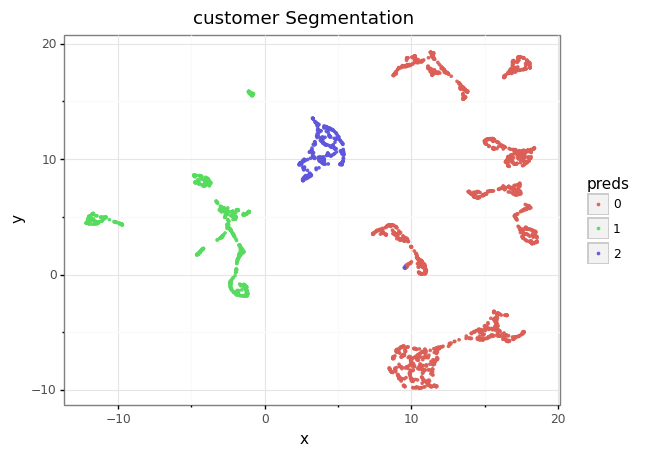

<ggplot: (8787349787341)>

In [ ]:
p2 = (p9.ggplot(gower_data, p9.aes(x='x', y='y', fill='preds', color='preds'))
      + p9.geom_point(alpha=0.9, size=0.5)
      + p9.ggtitle('customer Segmentation')
      + p9.theme_bw())
p2

In [ ]:
p['accountID']=resdf['accountID']

In [ ]:
p

,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved,final_Quarter,accountID
0,255.25,1.75,4,86.25,Q2,North America,No,Q2,00dkoj
1,103.50,2.00,2,119.50,Q1,North America,Yes,Q1,00fcnj
2,320.00,3.00,1,83.00,Q4,North America,No,Q4,00t9nx
3,167.50,1.75,4,56.25,Q1,EMEA,No,Q1,010sfv
4,106.00,2.50,2,82.50,Q1,EMEA,No,Q1,01ewog
...,...,...,...,...,...,...,...,...,...
2839,50.00,3.00,1,67.00,Q1,Latin America,No,Q1,zycnd0
2840,272.50,1.50,2,132.50,Q4,EMEA,No,Q4,zynk6x
2841,70.00,2.00,1,96.00,Q1,EMEA,No,Q1,zz5bex
2842,265.00,3.00,1,126.00,Q3,North America,No,Q3,zzn203


In [ ]:
p['cluster_labels']=gower_data["preds"].apply(str)

In [ ]:
gower_data

,contractSize,contractLength,Occurence_no,length_to_pay,partnerInvolved,final_Quarter,x,y,preds
0,255.25,1.75,4,86.25,No,Q2,3.534837,0.202632,1
1,103.50,2.00,2,119.50,Yes,Q1,20.980083,4.194847,2
2,320.00,3.00,1,83.00,No,Q4,3.377610,7.064159,0
3,167.50,1.75,4,56.25,No,Q1,1.475597,-9.103009,0
4,106.00,2.50,2,82.50,No,Q1,-0.189731,-11.899169,0
...,...,...,...,...,...,...,...,...,...
2839,50.00,3.00,1,67.00,No,Q1,-6.051010,-8.252278,1
2840,272.50,1.50,2,132.50,No,Q4,13.138783,3.906942,0
2841,70.00,2.00,1,96.00,No,Q1,-2.414196,-10.312436,1
2842,265.00,3.00,1,126.00,No,Q3,-10.272377,4.223267,2


In [ ]:
p[p['cluster_labels']=="1"]

,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved,final_Quarter,accountID,cluster_labels
1,103.500000,2.000000,2,119.50,Q1,North America,Yes,Q1,00fcnj,1
7,136.666667,2.666667,3,118.00,Q3,APAC,Yes,Q3,02k5gq,1
11,65.000000,3.000000,1,83.00,Q4,EMEA,Yes,Q4,048oq7,1
12,180.000000,2.000000,1,101.00,Q1,North America,Yes,Q1,05jqaf,1
17,140.000000,2.000000,1,92.00,Q2,North America,Yes,Q2,07egvp,1
...,...,...,...,...,...,...,...,...,...,...
2816,161.750000,1.750000,4,119.25,Q3,Latin America,Yes,Q3,zq0n9r,1
2823,257.500000,2.000000,2,148.50,Q2,APAC,Yes,Q2,zsyrln,1
2826,70.000000,1.000000,1,148.00,Q2,EMEA,Yes,Q2,zu7vr3,1
2829,230.000000,2.500000,2,109.00,Q4,North America,Yes,Q4,zuk30o,1


In [ ]:
testdataset

,closingDate,contractSize,contractLength,paymentDate,contract_expiry_date,accountID,Occurence_no,length_to_pay,region_APAC,region_Africa,...,partnerInvolved_No,partnerInvolved_Yes,Quarter_Q1,Quarter_Q2,Quarter_Q3,Quarter_Q4,is_renewal,istest,prob_not_renewed,renewed
6,2018-12-31,213.0,3,2019-04-25,2021-12-31,ujmvzq,4,115.0,1,0,...,1,0,0,0,0,1,renewed,Yes,0.204529,0.795471
11,2019-12-31,649.0,2,2020-03-20,2021-12-30,0ar1mc,5,80.0,0,0,...,1,0,0,0,0,1,renewed,Yes,0.052070,0.947930
778,2018-07-01,148.0,3,2018-10-20,2021-07-01,02k5gq,3,111.0,1,0,...,0,1,0,0,1,0,renewed,Yes,0.341623,0.658377
803,2020-07-03,95.0,1,2020-09-17,2021-07-03,c87762,4,76.0,0,1,...,1,0,0,0,1,0,renewed,Yes,0.121002,0.878998
806,2018-07-05,87.0,3,2018-09-23,2021-07-05,ffo2pk,3,80.0,0,1,...,1,0,0,0,1,0,renewed,Yes,0.215397,0.784603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7617,2020-12-25,275.0,1,2021-02-28,2021-12-25,xzz9vz,2,65.0,0,0,...,1,0,0,0,0,1,renewed,Yes,0.255351,0.744649
7618,2019-12-26,65.0,2,2020-03-06,2021-12-25,lu4e1r,1,71.0,0,0,...,1,0,0,0,0,1,renewed,Yes,0.442947,0.557053
7622,2019-12-27,85.0,2,2020-04-01,2021-12-26,og5921,1,96.0,1,0,...,0,1,0,0,0,1,not renewed,Yes,0.620184,0.379816
7624,2020-12-27,75.0,1,2021-03-14,2021-12-27,ejxn5j,2,77.0,0,0,...,1,0,0,0,0,1,renewed,Yes,0.326102,0.673898


In [ ]:
testdataset.shape

(616, 23)

In [ ]:
testdataset['accountID'].unique

<bound method Series.unique of 6       ujmvzq
11      0ar1mc
778     02k5gq
803     c87762
806     ffo2pk
         ...  
7617    xzz9vz
7618    lu4e1r
7622    og5921
7624    ejxn5j
7626    n0s2c3
Name: accountID, Length: 616, dtype: object>

In [ ]:
finaldf = pd.merge(p,testdataset[['accountID','is_renewal','prob_not_renewed','renewed']],on='accountID',how='inner')

In [ ]:
finaldf

,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved,final_Quarter,accountID,cluster_labels,is_renewal,prob_not_renewed,renewed
0,320.000000,3.000000,1,83.0,Q4,North America,No,Q4,00t9nx,2,renewed,0.439123,0.560877
1,147.000000,1.750000,4,75.0,Q3,North America,No,Q3,01kumi,0,renewed,0.083437,0.916563
2,136.666667,2.666667,3,118.0,Q3,APAC,Yes,Q3,02k5gq,1,renewed,0.341623,0.658377
3,140.800000,1.400000,5,101.2,Q4,North America,No,Q4,07x5kz,0,renewed,0.079088,0.920912
4,131.000000,2.000000,2,75.0,Q3,EMEA,No,Q3,08e5y5,0,renewed,0.268265,0.731735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,122.500000,2.000000,2,97.0,Q3,APAC,No,Q3,zqjvr0,0,renewed,0.369553,0.630447
612,130.000000,2.000000,3,76.0,Q4,North America,No,Q4,zs7uky,0,renewed,0.186610,0.813390
613,270.000000,2.000000,1,79.0,Q4,North America,No,Q4,zuftet,0,renewed,0.429893,0.570107
614,150.000000,2.000000,1,74.0,Q4,Latin America,No,Q4,zw9ffc,0,not renewed,0.534946,0.465054


In [ ]:
nr = finaldf[finaldf['is_renewal']=='not renewed']
r = finaldf[finaldf['is_renewal']=='renewed']

In [ ]:
nr

,contractSize,contractLength,Occurence_no,length_to_pay,Quarter,region,partnerInvolved,final_Quarter,accountID,cluster_labels,is_renewal,prob_not_renewed,renewed
9,70.0,2.0,1,82.0,Q3,APAC,Yes,Q3,0csile,1,not renewed,0.519581,0.480419
15,110.0,2.0,1,89.0,Q4,North America,Yes,Q4,0n30fj,1,not renewed,0.547424,0.452576
20,115.0,3.0,1,116.0,Q3,Africa,Yes,Q3,0tb1t6,1,not renewed,0.747363,0.252637
23,130.0,2.0,1,146.0,Q3,Africa,No,Q3,0uq34p,0,not renewed,0.837413,0.162587
25,85.0,2.0,1,120.0,Q4,EMEA,No,Q4,0y1g60,0,not renewed,0.714500,0.285500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,110.0,2.0,1,105.0,Q4,EMEA,No,Q4,ywkfy5,0,not renewed,0.635687,0.364313
602,118.5,2.0,2,139.5,Q3,EMEA,Yes,Q3,zahdxw,1,not renewed,0.740234,0.259766
609,115.0,3.0,1,114.0,Q3,APAC,No,Q3,zl7mrs,2,not renewed,0.643039,0.356961
614,150.0,2.0,1,74.0,Q4,Latin America,No,Q4,zw9ffc,0,not renewed,0.534946,0.465054


In [ ]:
nr1=nr[nr['cluster_labels']=="0"]
nr2=nr[nr['cluster_labels']=="1"]
nr3=nr[nr['cluster_labels']=="2"]
r1=nr[nr['cluster_labels']=="0"]
r2=nr[nr['cluster_labels']=="1"]
r3=nr[nr['cluster_labels']=="2"]

In [ ]:
nr1 = nr1.sort_values(by='prob_not_renewed', ignore_index=True,ascending=False)
nr2 = nr2.sort_values(by='prob_not_renewed', ignore_index=True,ascending=False)
nr3 = nr3.sort_values(by='prob_not_renewed', ignore_index=True,ascending=False)
r1 = r1.sort_values(by='renewed', ignore_index=True,ascending=True)
r2 = r2.sort_values(by='renewed', ignore_index=True,ascending=True)
r3 = r3.sort_values(by='renewed', ignore_index=True,ascending=True)

In [ ]:
pd.concat(nr1,nr2,nr3,r1,r2,r3)

In [ ]:
p[p['cluster_labels']=="1"]['contractSize'].mean()

147.88560157790928

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X_train.loc[:, ~X_train.columns.isin(removal_cls)], y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression( solver='liblinear')
logisticRegr.fit(X, y)
y_pred_ov=logisticRegr.predict(X_test.loc[:, ~X_test.columns.isin(removal_cls)])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ov, target_names=logisticRegr.classes_))

              precision    recall  f1-score   support

 not renewed       0.25      0.02      0.03       108
     renewed       0.87      0.99      0.92       694

    accuracy                           0.86       802
   macro avg       0.56      0.50      0.48       802
weighted avg       0.78      0.86      0.80       802



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.loc[:, ~X_train.columns.isin(removal_cls)])
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [ ]:
X_test_scaled=scaler.transform(X_test.loc[:, ~X_test.columns.isin(removal_cls)])

In [ ]:
y_pred_sc=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sc, target_names=model.classes_))

              precision    recall  f1-score   support

 not renewed       0.22      0.73      0.34       108
     renewed       0.94      0.61      0.73       694

    accuracy                           0.62       802
   macro avg       0.58      0.67      0.54       802
weighted avg       0.84      0.62      0.68       802

